<a href="https://colab.research.google.com/github/CIBIO-TropiBIO/Sentiment-Analysis-Natural-Parks/blob/main/Sentiment_Analysis_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Sat Feb 11 20:19:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import torch

"GPU Available" if torch.cuda.is_available() else "KK"

'KK'

In [3]:
! git clone https://huggingface.co/datasets/jvanz/portuguese_sentiment_analysis

Cloning into 'portuguese_sentiment_analysis'...
remote: Enumerating objects: 34, done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (34/34), 4.46 KiB | 652.00 KiB/s, done.
Filtering content: 100% (4/4), 463.20 MiB | 78.37 MiB/s, done.


In [4]:
%cd portuguese_sentiment_analysis

/content/portuguese_sentiment_analysis


In [7]:
!ls

data  dataset_infos.json  README.md


El siguiente es el dataset del ejemplo. Deberia acercarme a este formato.

In [5]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 76.1 MB/s eta 0:00:00


In [10]:
from datasets import load_dataset
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [31]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [34]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [36]:
!ls

data  dataset_infos.json  README.md


In [ ]:
import pandas as pd
pd.read_parquet('data/train-00000-of-00002.parquet', engine='pyarrow')

In [7]:
from datasets import load_dataset

#train_ds = load_dataset('parquet', data_files='data/train-00000-of-00002.parquet')
train_ds = load_dataset('parquet', data_files='data/validation-00000-of-00001.parquet')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/default-5f6d948726ba4070/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
dadddtrain_ds


DatasetDict({
    train: Dataset({
        features: ['polarity', 'review_text', 'review_text_processed'],
        num_rows: 149136
    })
})

# Nueva sección

In [9]:
train_ds2 = load_dataset('parquet', data_files='data/train-00001-of-00002.parquet')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/default-0d85b37819163d66/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
train_ds2

DatasetDict({
    train: Dataset({
        features: ['polarity', 'review_text', 'review_text_processed'],
        num_rows: 894810
    })
})

In [21]:
train_ds2['train']['review_text_processed'][0]

'muito legal este aplicativo pois sou fanatico por jogo aberto'

In [19]:
train_ds['train'][0]

{'polarity': 0.0,
 'review_text': 'Produto péssimo! A Americanas, deveria escolher melhor seus parceiros e o fabricante deveria ter vergonha de fabricar tal produto! A base da mesa, é de péssima qualidade, fica tudo tordo e com desnível. Quem desenvolveu não entende e não sabe o que é qualidade. A tampa preta de cima, ao parafusar, por ser fina, parafusos soltam fácil.  Não gastem o seu precioso dinheiro com isso!  Sugestão ao fabricante: faça algo com qualidade Obrigado Paulo',
 'review_text_processed': 'produto pessimo! a americanas, deveria escolher melhor seus parceiros e o fabricante deveria ter vergonha de fabricar tal produto! a base da mesa, e de pessima qualidade, fica tudo tordo e com desnivel. quem desenvolveu nao entende e nao sabe o que e qualidade. a tampa preta de cima, ao parafusar, por ser fina, parafusos soltam facil.  nao gastem o seu precioso dinheiro com isso!  sugestao ao fabricante: faca algo com qualidade obrigado paulo'}

In [8]:
from transformers import AutoTokenizer
#model_ckpt = "distilbert-base-uncased"
model_ckpt = "neuralmind/bert-base-portuguese-cased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [24]:
text="mds a lagoa do parque municipal eh a coisa mais linda à noite"
encoded_text = tokenizer(train_ds2['train']['review_text_processed'][0])
print(encoded_text)

{'input_ids': [101, 785, 7103, 860, 16357, 1502, 7206, 15406, 352, 319, 240, 1130, 5370, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [25]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'muito', 'legal', 'este', 'aplicativo', 'pois', 'sou', 'fan', '##at', '##ico', 'por', 'jogo', 'aberto', '[SEP]']


In [12]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] mds a lagoa do parque municipal eh a coisa mais linda à noite [SEP]


In [23]:
tokenizer.vocab_size

29794

In [24]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

In [11]:
import pandas as pd
train_ds.set_format(type="pandas")
df = train_ds["train"][:]
df.head()

,polarity,review_text,review_text_processed
0,1.0,Visualmente este filme é uma sucessão de orgas...,visualmente este filme e uma sucessao de orgas...
1,1.0,A mais fiel e ousada adaptação de uma Novel pa...,a mais fiel e ousada adaptacao de uma novel pa...
2,1.0,"Em termos de ideias, esse é o filme mais ambic...","em termos de ideias, esse e o filme mais ambic..."
3,1.0,Hilário....,hilario....
4,1.0,"Tudo correto, produto correto, prazo ok","tudo correto, produto correto, prazo ok"


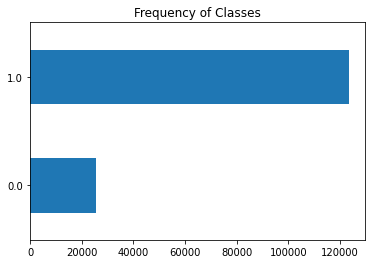

In [12]:
import matplotlib.pyplot as plt
df["polarity"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

Words per tweet

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


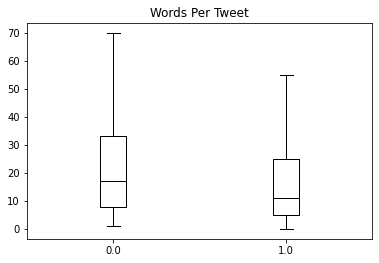

In [13]:
df["Words Per Tweet"] = df["review_text_processed"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="polarity", grid=False,showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show();

In [20]:
train_ds.reset_format()

Para tokenizar todo el texto

In [9]:
def tokenize(batch):
    return tokenizer(batch["review_text_processed"], padding=True, truncation=True)

In [19]:
train_ds["train"][:2]

,polarity,review_text,review_text_processed
0,1.0,Visualmente este filme é uma sucessão de orgas...,visualmente este filme e uma sucessao de orgas...
1,1.0,A mais fiel e ousada adaptação de uma Novel pa...,a mais fiel e ousada adaptacao de uma novel pa...


In [ ]:
print(tokenize(train_ds["train"][:2]))

In [17]:
train_ds

DatasetDict({
    train: Dataset({
        features: ['polarity', 'review_text', 'review_text_processed'],
        num_rows: 149136
    })
})

In [18]:
train_ds.set_format("pandas")

In [19]:
x = train_ds['train'][:4000]

In [23]:
from datasets import Dataset
x = Dataset.from_pandas(x)

In [24]:
x

Dataset({
    features: ['polarity', 'review_text', 'review_text_processed'],
    num_rows: 4000
})

In [25]:
train_ds_encoded = x.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [32]:
from transformers import AutoModel
import torch
#model_ckpt = "distilbert-base-uncased"

model_ckpt = "neuralmind/bert-base-portuguese-cased"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 18])


In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

In [19]:
outputs.last_hidden_state.size()

torch.Size([1, 18, 768])

In [20]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [26]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [28]:
train_ds_encoded

Dataset({
    features: ['polarity', 'review_text', 'review_text_processed', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4000
})

In [34]:
torch.cuda.empty_cache()
train_ds_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "polarity"])
train_ds_hidden = train_ds_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

OutOfMemoryError: ignored